# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4 # определяем размерность входных данных
hidden_size = 10 # определяем количество нейронов в скрытом слое
num_classes = 3 # определяем количество классов
num_inputs = 5 # определяем количество входных образцов

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1) # инициализируем модель с заданными размерностями и стандартным отклонением

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [17]:
scores = net.loss(X) # рассчитываем оценки для входных данных с помощью модели
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores))) # выводим сумму абсолютных разностей между полученными и корректными оценками

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [3]:
loss, _ = net.loss(X, y, reg=0.05) # вычисляем потери с помощью модели для входных данных и меток с заданным коэффициентом регуляризации
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss))) # выводим сумму абсолютных разностей между потерями

Difference between your loss and correct loss:
1.794120407794253e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [3]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05) # рассчитываем потери и градиенты с помощью модели для входных данных и меток с заданным коэффициентом регуляризации

# проходим по каждому параметру в градиентах
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0] # определяем функцию, которая вычисляет потери при заданных параметрах
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False) # численно вычисляем градиент параметра
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))) # выводим максимальную относительную ошибку между численно оцененным и вычисленным градиентами

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865070e-11


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149607938732037


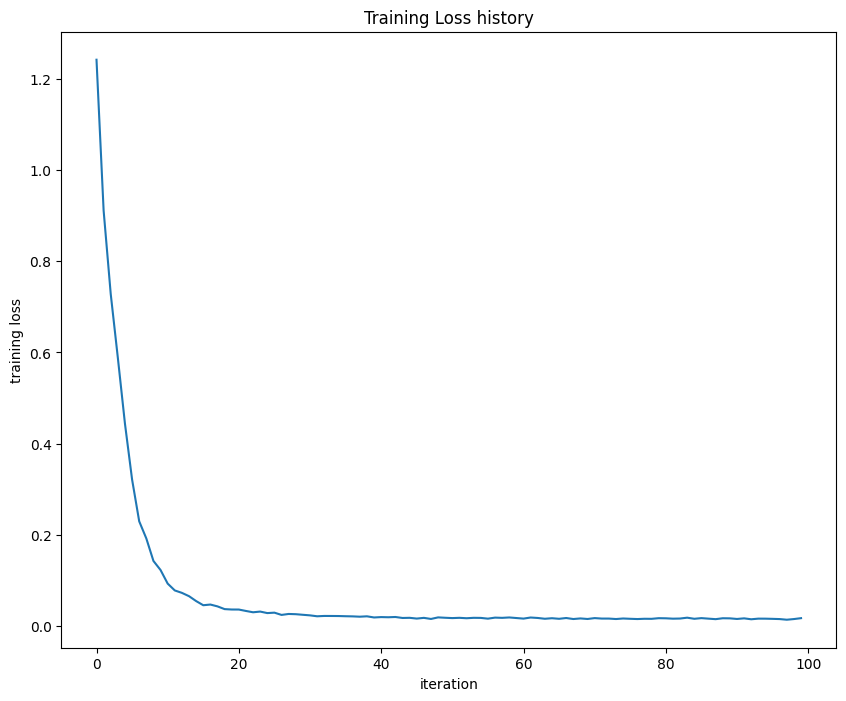

In [3]:
net = init_toy_model() # создаем модель нейронной сети
# обучаем модель на смоделированных данных
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1]) # выводим финальное значение потерь на тренировочном наборе данных

# визуализируем историю потерь на протяжении обучения
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [6]:
from scripts.data_utils import load_CIFAR10
cifar10_dir = 'scripts/datasets/cifar-10-batches-py' # определяем, где лежат данные CIFAR-10
# определяем размеры различных наборов данных
num_train = 49000
num_val = 1000
num_test = 1000
num_dev = 500

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir) # загружаем данные CIFAR-10

# выбираем данные для наборов обучения, валидации, тестирования и разработки
mask = range(num_train, num_train + num_val)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_train)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# выполняем решейпинг данных для удобства использования в классификаторе
X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0],))

X_val = np.reshape(X_val, (X_val.shape[0], -1))
y_val = np.reshape(y_val, (y_val.shape[0],))

X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0],))

X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))

# выводим размеры каждого из наборов данных
print(f"Тренировочная выборка: X={X_train.shape}, y={y_train.shape}")
print(f"Валидационная выборка: X={X_val.shape}, y={y_val.shape}")
print(f"Тестовая выборка: X={X_test.shape}, y={y_test.shape}")
print(f"Выборка для разработки: X={X_dev.shape}, y={y_dev.shape}")

Тренировочная выборка: X=(49000, 3072), y=(49000,)
Валидационная выборка: X=(1000, 3072), y=(1000,)
Тестовая выборка: X=(1000, 3072), y=(1000,)
Выборка для разработки: X=(500, 3072), y=(500,)


Параметры метода train:

X_train: Это массив numpy, содержащий обучающие данные. Он имеет форму (N, D), где N - количество обучающих примеров, а D - количество признаков для каждого примера

y_train: Это массив numpy, содержащий метки обучающих данных. Он имеет форму (N,), где N - количество обучающих примеров. Каждый элемент y[i] соответствует метке для i-го примера в X

X_val: Это массив numpy, содержащий данные для валидации. Он имеет форму (N_val, D), где N_val - количество примеров в валидационном наборе, а D - количество признаков для каждого примера

y_val: Это массив numpy, содержащий метки для валидационных данных. Он имеет форму (N_val,), где N_val - количество примеров в валидационном наборе. Каждый элемент y_val[i] соответствует метке для i-го примера в X_val

learning_rate: Это скалярное значение, определяющее скорость обучения для оптимизации градиентным спуском

learning_rate_decay: Это скалярное значение, определяющее коэффициент уменьшения скорости обучения после каждой эпохи обучения

reg: Это скалярное значение, определяющее силу регуляризации. Регуляризация используется для предотвращения переобучения путем штрафа на большие значения весовых коэффициентов

num_iters: Это количество итераций оптимизации, которые будут выполнены во время обучения

batch_size: Это количество обучающих примеров, используемых для вычисления градиента на каждом шаге оптимизации. Использование батчей позволяет ускорить процесс обучения и улучшить стабильность обновлений весовых коэффициентов

verbose: Это логическое значение, которое определяет, нужно ли выводить информацию о прогрессе обучения во время оптимизации. Если установлено в True, то будут выводиться сообщения о прогрессе, если False - не будет

In [7]:
input_size = 32 * 32 * 3 # определяем размер входных данных
hidden_size = 50 # определяем количество нейронов в скрытом слое
num_classes = 10 # определяем количество классов для классификации
net = TwoLayerNet(input_size, hidden_size, num_classes) # создаем двухслойную нейронную сеть

# обучаем нейронную сеть с использованием указанных параметров
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean() # оцениваем точность на валидационном наборе данных
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302981
iteration 100 / 1000: loss 2.301387
iteration 200 / 1000: loss 2.256163
iteration 300 / 1000: loss 2.178315
iteration 400 / 1000: loss 2.110113
iteration 500 / 1000: loss 2.007851
iteration 600 / 1000: loss 2.004287
iteration 700 / 1000: loss 1.876786
iteration 800 / 1000: loss 1.852164
iteration 900 / 1000: loss 2.017891
Validation accuracy:  0.302


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

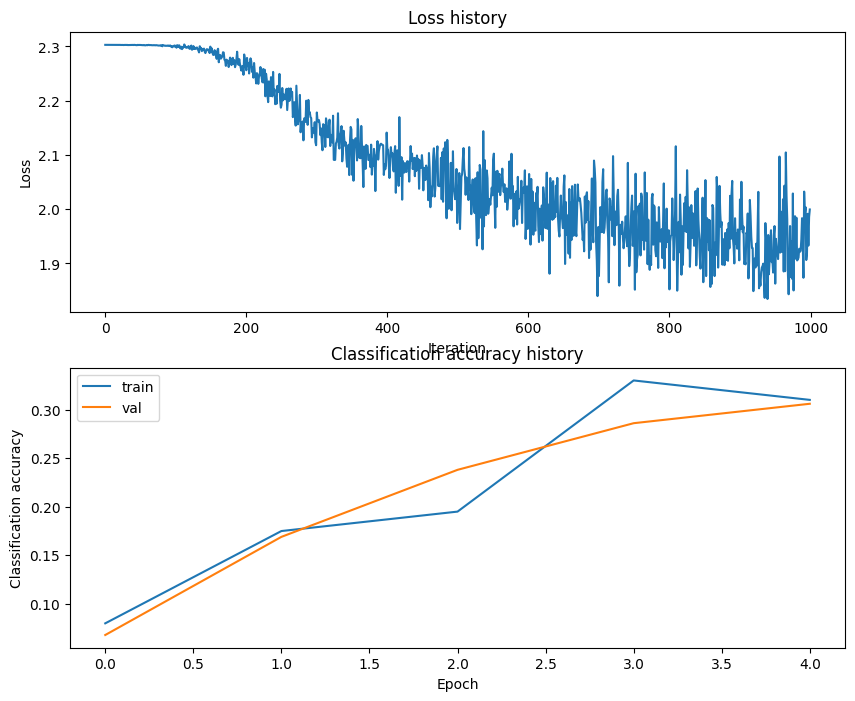

In [8]:
# построение графика истории потерь
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# построение графика истории точности классификации
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

# Более неудачные попытки

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=16500, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=4, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 16500: loss 2.308806
iteration 100 / 16500: loss 2.303901
iteration 200 / 16500: loss 2.307476
iteration 300 / 16500: loss 2.207717
iteration 400 / 16500: loss 2.024155
iteration 500 / 16500: loss 2.190033
iteration 600 / 16500: loss 2.047659
iteration 700 / 16500: loss 2.082517
iteration 800 / 16500: loss 2.046117
iteration 900 / 16500: loss 1.958719
iteration 1000 / 16500: loss 2.064798
iteration 1100 / 16500: loss 2.152527
iteration 1200 / 16500: loss 1.967051
iteration 1300 / 16500: loss 2.115776
iteration 1400 / 16500: loss 1.985075
iteration 1500 / 16500: loss 1.814888
iteration 1600 / 16500: loss 2.086234
iteration 1700 / 16500: loss 2.065398
iteration 1800 / 16500: loss 2.092649
iteration 1900 / 16500: loss 1.899854
iteration 2000 / 16500: loss 1.936313
iteration 2100 / 16500: loss 1.875780
iteration 2200 / 16500: loss 1.937774
iteration 2300 / 16500: loss 1.932559
iteration 2400 / 16500: loss 1.972248
iteration 2500 / 16500: loss 2.171280
iteration 2600 / 16500: 

In [10]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10500, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=4, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 10500: loss 2.314958
iteration 100 / 10500: loss 2.309700
iteration 200 / 10500: loss 2.274477
iteration 300 / 10500: loss 2.159414
iteration 400 / 10500: loss 2.090442
iteration 500 / 10500: loss 2.135180
iteration 600 / 10500: loss 2.011708
iteration 700 / 10500: loss 2.065092
iteration 800 / 10500: loss 1.954976
iteration 900 / 10500: loss 2.115284
iteration 1000 / 10500: loss 1.974524
iteration 1100 / 10500: loss 2.103894
iteration 1200 / 10500: loss 2.062529
iteration 1300 / 10500: loss 1.970958
iteration 1400 / 10500: loss 1.873847
iteration 1500 / 10500: loss 2.055110
iteration 1600 / 10500: loss 2.086019
iteration 1700 / 10500: loss 2.023316
iteration 1800 / 10500: loss 1.976658
iteration 1900 / 10500: loss 2.109874
iteration 2000 / 10500: loss 1.956411
iteration 2100 / 10500: loss 1.953174
iteration 2200 / 10500: loss 2.028811
iteration 2300 / 10500: loss 1.964215
iteration 2400 / 10500: loss 1.942444
iteration 2500 / 10500: loss 2.050826
iteration 2600 / 10500: 

In [11]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10500, batch_size=100,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 10500: loss 2.304082
iteration 100 / 10500: loss 2.294651
iteration 200 / 10500: loss 2.262820
iteration 300 / 10500: loss 2.059386
iteration 400 / 10500: loss 1.995851
iteration 500 / 10500: loss 2.019734
iteration 600 / 10500: loss 1.940946
iteration 700 / 10500: loss 1.916395
iteration 800 / 10500: loss 1.819428
iteration 900 / 10500: loss 1.953832
iteration 1000 / 10500: loss 1.896041
iteration 1100 / 10500: loss 1.890258
iteration 1200 / 10500: loss 2.013214
iteration 1300 / 10500: loss 1.778266
iteration 1400 / 10500: loss 1.789690
iteration 1500 / 10500: loss 1.881943
iteration 1600 / 10500: loss 1.802955
iteration 1700 / 10500: loss 1.695240
iteration 1800 / 10500: loss 1.850311
iteration 1900 / 10500: loss 1.732995
iteration 2000 / 10500: loss 1.811641
iteration 2100 / 10500: loss 2.010351
iteration 2200 / 10500: loss 1.854515
iteration 2300 / 10500: loss 1.897599
iteration 2400 / 10500: loss 1.814874
iteration 2500 / 10500: loss 1.860405
iteration 2600 / 10500: 

In [12]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=7000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.75, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 7000: loss 2.304866
iteration 100 / 7000: loss 2.295481
iteration 200 / 7000: loss 2.235322
iteration 300 / 7000: loss 2.149067
iteration 400 / 7000: loss 2.094516
iteration 500 / 7000: loss 2.058781
iteration 600 / 7000: loss 1.991231
iteration 700 / 7000: loss 1.984022
iteration 800 / 7000: loss 1.994409
iteration 900 / 7000: loss 1.983188
iteration 1000 / 7000: loss 1.949212
iteration 1100 / 7000: loss 1.952405
iteration 1200 / 7000: loss 1.935462
iteration 1300 / 7000: loss 1.888982
iteration 1400 / 7000: loss 1.878757
iteration 1500 / 7000: loss 1.905386
iteration 1600 / 7000: loss 1.955994
iteration 1700 / 7000: loss 1.868114
iteration 1800 / 7000: loss 1.837259
iteration 1900 / 7000: loss 1.877648
iteration 2000 / 7000: loss 1.811350
iteration 2100 / 7000: loss 1.728174
iteration 2200 / 7000: loss 1.825055
iteration 2300 / 7000: loss 1.843689
iteration 2400 / 7000: loss 1.823150
iteration 2500 / 7000: loss 1.863413
iteration 2600 / 7000: loss 1.753322
iteration 270

# Самая удачная попытка

In [13]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=150,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.75, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 10000: loss 2.304875
iteration 100 / 10000: loss 2.295894
iteration 200 / 10000: loss 2.278618
iteration 300 / 10000: loss 2.066297
iteration 400 / 10000: loss 2.049366
iteration 500 / 10000: loss 2.047741
iteration 600 / 10000: loss 2.127474
iteration 700 / 10000: loss 1.930305
iteration 800 / 10000: loss 2.012328
iteration 900 / 10000: loss 1.981459
iteration 1000 / 10000: loss 1.819270
iteration 1100 / 10000: loss 1.926778
iteration 1200 / 10000: loss 1.901455
iteration 1300 / 10000: loss 1.769185
iteration 1400 / 10000: loss 1.860207
iteration 1500 / 10000: loss 1.867125
iteration 1600 / 10000: loss 1.748020
iteration 1700 / 10000: loss 1.754827
iteration 1800 / 10000: loss 1.857453
iteration 1900 / 10000: loss 1.891394
iteration 2000 / 10000: loss 1.813367
iteration 2100 / 10000: loss 1.847243
iteration 2200 / 10000: loss 1.869072
iteration 2300 / 10000: loss 1.735995
iteration 2400 / 10000: loss 1.704500
iteration 2500 / 10000: loss 1.831554
iteration 2600 / 10000: 

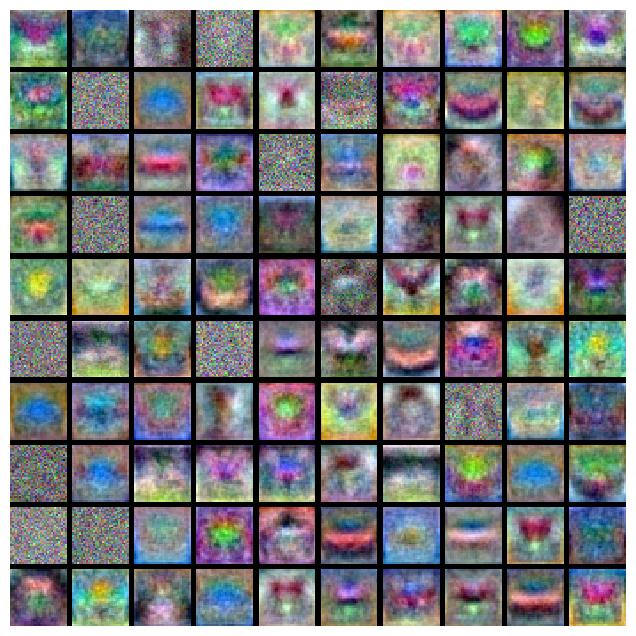

In [15]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1'] # получаем веса первого слоя из параметров нейронной сети
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2) #  преобразовываем форму весов первого слоя для визуализации
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8')) # отображаем сетку весов первого слоя
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [17]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_test, y_test,
            num_iters=10000, batch_size=150,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.75, verbose=True)

test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 10000: loss 2.304919
iteration 100 / 10000: loss 2.300641
iteration 200 / 10000: loss 2.230213
iteration 300 / 10000: loss 2.203984
iteration 400 / 10000: loss 2.056063
iteration 500 / 10000: loss 2.011320
iteration 600 / 10000: loss 2.115753
iteration 700 / 10000: loss 1.864790
iteration 800 / 10000: loss 1.946802
iteration 900 / 10000: loss 1.968729
iteration 1000 / 10000: loss 2.018925
iteration 1100 / 10000: loss 1.918906
iteration 1200 / 10000: loss 1.827151
iteration 1300 / 10000: loss 1.905727
iteration 1400 / 10000: loss 1.879650
iteration 1500 / 10000: loss 1.795801
iteration 1600 / 10000: loss 1.727586
iteration 1700 / 10000: loss 1.881396
iteration 1800 / 10000: loss 1.773825
iteration 1900 / 10000: loss 1.928296
iteration 2000 / 10000: loss 1.929200
iteration 2100 / 10000: loss 1.858101
iteration 2200 / 10000: loss 1.729284
iteration 2300 / 10000: loss 1.725596
iteration 2400 / 10000: loss 1.787827
iteration 2500 / 10000: loss 1.819533
iteration 2600 / 10000: 

Сделайте выводы по результатам работы. 

1. Была реализована полносвязная нейронная сеть. Результаты практически не отличались от заданных вручную корректных значений, что показывает корректную реализацию нейронной сети.  
2. Точность модели очень сильно зависит от подобранных гиперпараметров. При тестировании на данных CIFAR-10 после подбора гиперпараметров перебором получилось увеличить accuracy модели до 0.467, что в 1.5 раза лучше, чем было изначально.